In [33]:
#Packages required

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import time
import matplotlib.patches as mpatches

In [4]:
#import data 
df = pd.read_csv('census.csv')
df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [5]:
n_rec = df.shape[0]
n_rec

45222

In [6]:
#Target variable
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [7]:
# Peaople with more than 50K income
n_greater50 = df[df['income']=='>50K']
n_greater50.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K
10,37,Private,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0.0,0.0,80.0,United-States,>50K
11,30,State-gov,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0.0,0.0,40.0,India,>50K


In [8]:
# People with less than 50K income
n_atmost50 = df[df['income']=='<=50K']
n_atmost50.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [9]:
# verifying
df.shape[0] == n_greater50.shape[0]+n_atmost50.shape[0]

True

In [10]:
# percentage of people with more than 50K income
greater_percent = (float(n_greater50.shape[0])/df.shape[0])*100
greater_percent

24.78439697492371

In [11]:
# checking if there is null data
df.isnull().any()

age                False
workclass          False
education_level    False
education-num      False
marital-status     False
occupation         False
relationship       False
race               False
sex                False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
dtype: bool

In [12]:
# checking the if there are any duplicates
sum(df.duplicated())

5982

In [13]:
# Descriptive stats of data
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


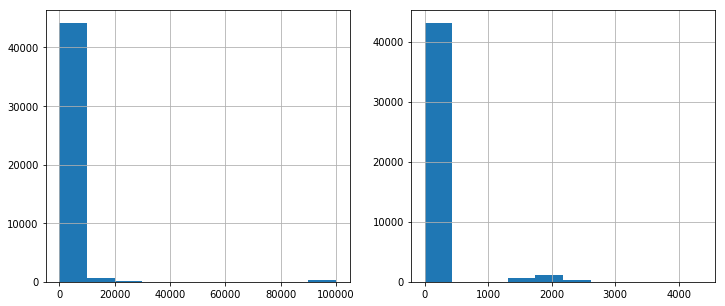

In [14]:
# Distributions of interesting features
# They are skewed
fig, ax = plt.subplots(1,2)

df['capital-gain'].hist(ax=ax[0],figsize=(12,5))
df['capital-loss'].hist(ax=ax[1],figsize=(12,5))

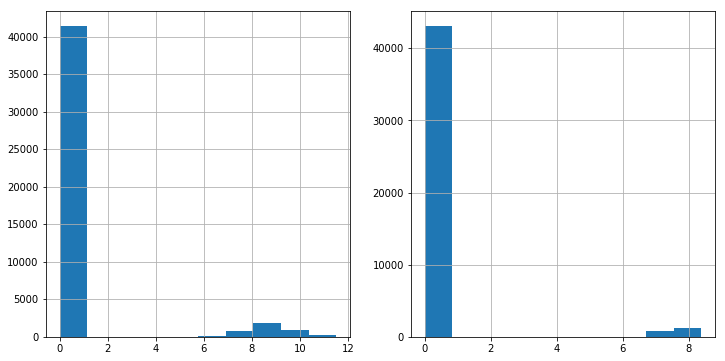

In [15]:
# Transforming the data using log Transformations
skewed = ['capital-gain','capital-loss']
df[skewed] = df[skewed].apply(lambda x: np.log(x+1))

fig,ax = plt.subplots(1,2)
df['capital-gain'].hist(ax=ax[0],figsize=(12,6),)
df['capital-loss'].hist(ax=ax[1],figsize=(12,6))

In [16]:
# Numeric Features 
numeric = ['age','education-num','capital-gain','capital-loss','hours-per-week']

In [17]:
#normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numeric] = scaler.fit_transform(df[numeric])
df[numeric].head()                         


C:\Users\tejav\Anaconda3\envs\python2\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,age,education-num,capital-gain,capital-loss,hours-per-week
0,0.301370,0.800000,0.667492,0.0,0.397959
1,0.452055,0.800000,0.000000,0.0,0.122449
2,0.287671,0.533333,0.000000,0.0,0.397959
3,0.493151,0.400000,0.000000,0.0,0.397959
4,0.150685,0.800000,0.000000,0.0,0.397959


In [18]:
#Seperating the target variable and Features 
income = df['income']
features = df.drop('income',axis=1)
features.columns

Index([u'age', u'workclass', u'education_level', u'education-num',
       u'marital-status', u'occupation', u'relationship', u'race', u'sex',
       u'capital-gain', u'capital-loss', u'hours-per-week', u'native-country'],
      dtype='object')

In [19]:
# encoding categorical data using one-hot encoding
features = pd.get_dummies(features)
features.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# converting target variable into numeric values
income = income.apply(lambda x:0 if x=='<=50K' else 1)
income.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [21]:
# Splitting the Data into train and test data for evaluating different models
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,income,test_size=0.2,random_state=2)
print('training set size {}'.format(X_train.shape[0]))
print('test set size {}'.format(X_test.shape[0]))

training set size 36177
test set size 9045


In [22]:
# Metrics used to evaluate the models
accuracy = float(n_greater50.shape[0])/df.shape[0]

beta = 0.5
recall = 1.0
precision = accuracy

Fbeta = (1+beta**2)*((float(precision)*recall)/((beta**2+precision)+recall))

print(accuracy,Fbeta)

(0.2478439697492371, 0.20683393493810484)


In [23]:
# Helper function to train different models on various sample sizes to evaluate performance
from sklearn.metrics import accuracy_score,fbeta_score
def train_learner(learner,sample,X_train,y_train,X_test,y_test):
    results = {}
    start = time.time()
    learner.fit(X_train.iloc[:sample,:],y_train[:sample])
    end = time.time()
    results['train_time'] = end - start
    
    start = time.time()
    test_pred = learner.predict(X_test)
    train_pred = learner.predict(X_train[:300])
    end = time.time()
    results['prediction_time'] = end-start
    
    results['train_acc'] = accuracy_score(y_train[:300],train_pred[:300])
    results['test_acc'] = accuracy_score(y_test,test_pred)
    results['train_fbeta'] = fbeta_score(y_train[:300],train_pred[:300],beta=0.5)
    results['test_fbeta'] = fbeta_score(y_test,test_pred,beta=0.5)
    
    print('{} class trained on {} samples in {} time'.format(learner.__class__.__name__,sample,results['train_time']))
    
    return results

In [24]:
# Training models to evaluate 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

cl_1 = DecisionTreeClassifier(random_state=2)
cl_2 = RandomForestClassifier(random_state=2)
cl_3 = SVC(random_state=2)

sample_1 = int(X_train.shape[0]*0.01)
sample_10 = int(X_train.shape[0]*0.1)
sample_100 = int(X_train.shape[0]*1)

results = {}

for clf in [cl_1,cl_2,cl_3]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i,size in enumerate([sample_1,sample_10,sample_100]):
        results[clf_name][i] = \
        train_learner(clf,size,X_train,y_train,X_test,y_test)

results
        

DecisionTreeClassifier class trained on 361 samples in 0.00399994850159 time
DecisionTreeClassifier class trained on 3617 samples in 0.0409998893738 time
DecisionTreeClassifier class trained on 36177 samples in 0.760999917984 time
RandomForestClassifier class trained on 361 samples in 0.050999879837 time


C:\Users\tejav\Anaconda3\envs\python2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier class trained on 3617 samples in 0.113000154495 time
RandomForestClassifier class trained on 36177 samples in 1.09599995613 time


C:\Users\tejav\Anaconda3\envs\python2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\tejav\Anaconda3\envs\python2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC class trained on 361 samples in 0.0319998264313 time
SVC class trained on 3617 samples in 2.34900021553 time
SVC class trained on 36177 samples in 228.196000099 time


{'DecisionTreeClassifier': {0: {'prediction_time': 0.013000011444091797,
   'test_acc': 0.7894969596462134,
   'test_fbeta': 0.5771177860276747,
   'train_acc': 1.0,
   'train_fbeta': 1.0,
   'train_time': 0.003999948501586914},
  1: {'prediction_time': 0.015000104904174805,
   'test_acc': 0.7957987838584853,
   'test_fbeta': 0.5881588072122053,
   'train_acc': 0.9966666666666667,
   'train_fbeta': 0.9973045822102425,
   'train_time': 0.0409998893737793},
  2: {'prediction_time': 0.020999908447265625,
   'test_acc': 0.8148148148148148,
   'test_fbeta': 0.6254622781065089,
   'train_acc': 0.96,
   'train_fbeta': 0.955223880597015,
   'train_time': 0.7609999179840088}},
 'RandomForestClassifier': {0: {'prediction_time': 0.03800010681152344,
   'test_acc': 0.7991155334438916,
   'test_fbeta': 0.5884197324414715,
   'train_acc': 0.98,
   'train_fbeta': 0.9829059829059831,
   'train_time': 0.05099987983703613},
  1: {'prediction_time': 0.04999995231628418,
   'test_acc': 0.8235489220563847,

In [25]:
# Helper function to plot the results for better understanding
def evaluate(results):
    fig,axs = plt.subplots(2,3,figsize=(12,10))
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    for k,learner in enumerate(results.keys()):
        for j,metrics in enumerate(['train_time','train_acc','train_fbeta','prediction_time','test_acc','test_fbeta']):
            for i in range(3):
                axs[j/3,j%3].bar(i+k*bar_width,results[learner][i][metrics],width=bar_width,color=colors[k])
                axs[j/3,j%3].set_xticks([0.45,1.45,2.45])
                axs[j/3,j%3].set_xticklabels(['1%','10%','100%'])
                axs[j/3,j%3].set_xlabel("Training set size")
                axs[j/3,j%3].set_xlim((-0.1,3.0))
    axs[0, 0].set_ylabel("Time (in seconds)")
    axs[0, 1].set_ylabel("Accuracy Score")
    axs[0, 2].set_ylabel("F-score")
    axs[1, 0].set_ylabel("Time (in seconds)")
    axs[1, 1].set_ylabel("Accuracy Score")
    axs[1, 2].set_ylabel("F-score")
    
    # Add titles
    axs[0, 0].set_title("Model Training")
    axs[0, 1].set_title("Accuracy Score on Training Subset")
    axs[0, 2].set_title("F-score on Training Subset")
    axs[1, 0].set_title("Model Predicting")
    axs[1, 1].set_title("Accuracy Score on Testing Set")
    axs[1, 2].set_title("F-score on Testing Set") 
    
    axs[0, 1].set_ylim((0, 1))
    axs[0, 2].set_ylim((0, 1))
    axs[1, 1].set_ylim((0, 1))
    axs[1, 2].set_ylim((0, 1))
    
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    #plt.tight_layout()
    plt.show()

          
                

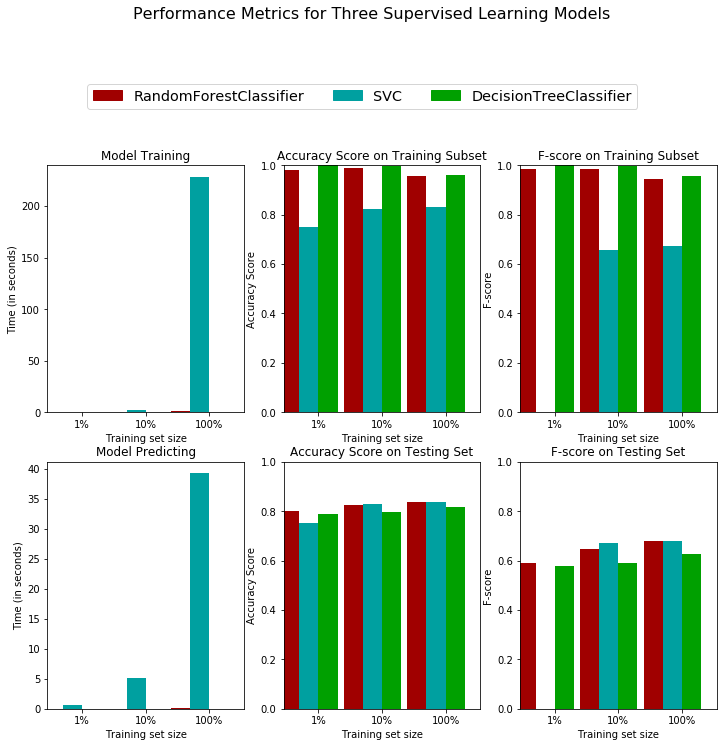

In [26]:
evaluate(results)

In [30]:
# From the results we can conclude that the RandomForestClassifier performed the best considering how well it generalized on test data
# Tuning the model for better results 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
clf = RandomForestClassifier(random_state=0)
parameters = {'n_estimators':[10,50,500,1000,2000],
             'criterion':['gini','entropy']}
scorer = make_scorer(fbeta_score,beta=0.5)
grid_obj = GridSearchCV(clf,parameters,scoring=scorer)
grid_fit = grid_obj.fit(X_train,y_train)
best_clf = grid_fit.best_estimator_

pred = clf.fit(X_train,y_train).predict(X_test)
best_preds = best_clf.predict(X_test)

print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, pred))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, pred, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_preds))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_preds, beta = 0.5))

Unoptimized model
------
Accuracy score on testing data: 0.8339
F-score on testing data: 0.6700

Optimized Model
------
Final accuracy score on the testing data: 0.8375
Final F-score on the testing data: 0.6762


In [31]:
# parapmeters for the best predictor
best_clf = grid_fit.best_estimator_

In [32]:
# Comparing the metrics before and after tuning 
pred = clf.fit(X_train,y_train).predict(X_test)
best_preds = best_clf.predict(X_test)

print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, pred))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, pred, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_preds))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_preds, beta = 0.5))

Unoptimized model
------
Accuracy score on testing data: 0.8339
F-score on testing data: 0.6700

Optimized Model
------
Final accuracy score on the testing data: 0.8375
Final F-score on the testing data: 0.6762


In [ ]:
# Tuning the model had minimal effect on the data, we can see that there is still bias 
# which can be reduced by feature engineering and trying out different samples of the data.